## EDA for 1 model "Accepted 1 or rejected 0"?

In [1]:
%load_ext lab_black
%reload_ext autoreload
%autoreload 1

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import functions as myFunc
import warnings

import statsmodels.stats.api as sms
from math import ceil
import scipy.stats as stats

warnings.simplefilter(action="ignore", category=FutureWarning)

In [3]:
pd.set_option("float_format", "{:.2f}".format)
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 150)

# Preparation for EDA

In [4]:
rejected_loan_df = pd.read_csv("final_cleaned_rejected_loan_df.csv")

In [5]:
accepted_loan_df = pd.read_csv("final_cleaned_accepted_loan_df.csv")

C:\Users\jonyt\AppData\Local\Temp\ipykernel_7988\1658635086.py:1: DtypeWarning: Columns (45,114,115,116,121,127) have mixed types. Specify dtype option on import or set low_memory=False.
  accepted_loan_df = pd.read_csv("final_cleaned_accepted_loan_df.csv")


One of our models will predict if person gets loan or no. Let's perform EDA connected to this question. To analyse differences between rejected and approved loeans decisions, we need to compare same columns between two datasets. Lets select just needed columns for 1 model EDA.

In [6]:
accepted_loan_df.head()

,Unnamed: 0,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,pymnt_plan,addr_state,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,settlement_status,settlement_amount,settlement_percentage,settlement_term,Month issue_d,Year issue_d,Risk_Score
0,0,3600.00,3600.00,3600.00,36.00,13.99,123.03,C,C4,10.00,MORTGAGE,55000.00,Not Verified,Fully Paid,n,PA,5.91,0.00,1.00,30.00,NaN,7.00,0.00,2765.00,29.70,13.00,w,0.00,0.00,4421.72,4421.72,3600.00,821.72,0.00,0.00,0.00,122.67,564.00,560.00,0.00,30.00,1.00,Individual,NaN,NaN,NaN,0.00,722.00,144904.00,2.00,2.00,0.00,1.00,21.00,4981.00,36.00,3.00,3.00,722.00,34.00,9300.00,3.00,1.00,4.00,4.00,20701.00,1506.00,37.20,0.00,0.00,148.00,128.00,3.00,3.00,1.00,4.00,69.00,4.00,69.00,2.00,2.00,4.00,2.00,5.00,3.00,4.00,9.00,4.00,7.00,0.00,0.00,0.00,3.00,76.90,0.00,0.00,0.00,178050.00,7746.00,2400.00,13734.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,12.00,2015.00,677.00
1,1,24700.00,24700.00,24700.00,36.00,11.99,820.28,C,C1,10.00,MORTGAGE,65000.00,Not Verified,Fully Paid,n,SD,16.06,1.00,4.00,6.00,NaN,22.00,0.00,21470.00,19.20,38.00,w,0.00,0.00,25679.66,25679.66,24700.00,979.66,0.00,0.00,0.00,926.35,699.00,695.00,0.00,NaN,1.00,Individual,NaN,NaN,NaN,0.00,0.00,204396.00,1.00,1.00,0.00,1.00,19.00,18005.00,73.00,2.00,3.00,6472.00,29.00,111800.00,0.00,0.00,6.00,4.00,9733.00,57830.00,27.10,0.00,0.00,113.00,192.00,2.00,2.00,4.00,2.00,NaN,0.00,6.00,0.00,5.00,5.00,13.00,17.00,6.00,20.00,27.00,5.00,22.00,0.00,0.00,0.00,2.00,97.40,7.70,0.00,0.00,314017.00,39475.00,79300.00,24667.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,12.00,2015.00,717.00
2,2,20000.00,20000.00,20000.00,60.00,10.78,432.66,B,B4,10.00,MORTGAGE,63000.00,Not Verified,Fully Paid,n,IL,10.78,0.00,0.00,NaN,NaN,6.00,0.00,7869.00,56.20,18.00,w,0.00,0.00,22705.92,22705.92,20000.00,2705.92,0.00,0.00,0.00,15813.30,704.00,700.00,0.00,NaN,1.00,Joint App,71000.00,13.85,Not Verified,0.00,0.00,189699.00,0.00

In [7]:
accepted_loan_df = accepted_loan_df[
    [
        "loan_amnt",
        "Risk_Score",
        "dti",
        "emp_length",
        "addr_state",
        "policy_code",
        "Month issue_d",
        "Year issue_d",
    ]
]

Let's tranform our target feature to binary number.

In [8]:
rejected_loan_df["Approved"] = 0

In [9]:
accepted_loan_df["Approved"] = 1

Let's sample rejected dataset to be same size as accepted dataframe.

In [10]:
rejected_loan_df_EDA = rejected_loan_df.sample(
    n=accepted_loan_df.shape[0], random_state=1
)

Let's make column names the same.

In [11]:
accepted_loan_df.rename(
    columns={
        "loan_amnt": "Amount Requested",
        "dti": "Debt-To-Income Ratio",
        "loan_amnt": "Amount Requested",
        "emp_length": "Employment Length",
        "addr_state": "State",
        "policy_code": "Policy Code",
        "Month issue_d": "Month",
        "Year issue_d": "Year",
    },
    inplace=True,
)

In [12]:
df = pd.concat([accepted_loan_df, rejected_loan_df_EDA], axis=0, ignore_index=True)
df = df.drop("Unnamed: 0", axis=1)

In [13]:
df.head()

,Amount Requested,Risk_Score,Debt-To-Income Ratio,Employment Length,State,Policy Code,Month,Year,Approved
0,3600.00,677.00,5.91,10.00,PA,1.00,12.00,2015.00,1
1,24700.00,717.00,16.06,10.00,SD,1.00,12.00,2015.00,1
2,20000.00,697.00,10.78,10.00,IL,1.00,12.00,2015.00,1
3,35000.00,787.00,17.06,10.00,NJ,1.00,12.00,2015.00,1
4,10400.00,697.00,25.37,3.00,PA,1.00,12.00,2015.00,1


We got our final dataset for EDA.

# EDA

### Target feature  - Approved  

Target feature may have values 1 for approved and 0 for rejected.  We created balanced data set for this EDA.

In [14]:
df.Approved.value_counts()

1    2256394
0    2256394
Name: Approved, dtype: int64

### Independent variables

To analyze independent variables we will be using few plotting functions wich counts independent feature per target feature and shows proportions of target feature in independent feature.

**Employment Length**

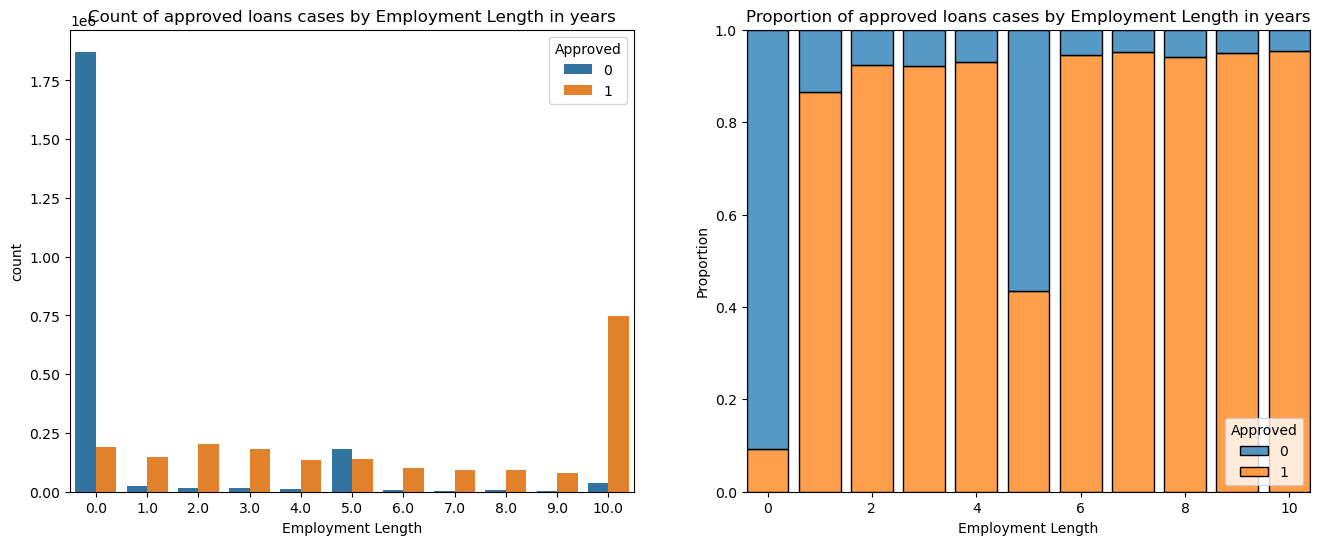

In [15]:
myFunc.my_plots(
    df,
    "Employment Length",
    "Approved",
    "Count of approved loans cases by Employment Length in years",
    "Proportion of approved loans cases by Employment Length in years",
)

We may see, that most of the rejected people were working less than one year and proportion of approved is highest in ten years and more, so employment length is very important feature. Also we may see, that proportion suddenly drops at employment length of 5 years. We will check this drop performing statistical inference later.

**Debt-To-Income Ratio**

In [16]:
df.loc[df["Approved"] == 1, "Debt-To-Income Ratio"].describe()

count   2256394.00
mean         18.57
std           9.30
min           0.00
25%          11.89
50%          17.82
75%          24.46
max         100.00
Name: Debt-To-Income Ratio, dtype: float64

In [17]:
df.loc[df["Approved"] == 0, "Debt-To-Income Ratio"].describe()

count   2256394.00
mean         26.57
std          24.56
min           0.00
25%           9.37
50%          20.34
75%          35.62
max         100.00
Name: Debt-To-Income Ratio, dtype: float64

We may see, that there is difference (around 8%) in means of debt to income ratio between approved and rejected customers. Approved customers ussualy get 18,5%, rejected 26,5%.

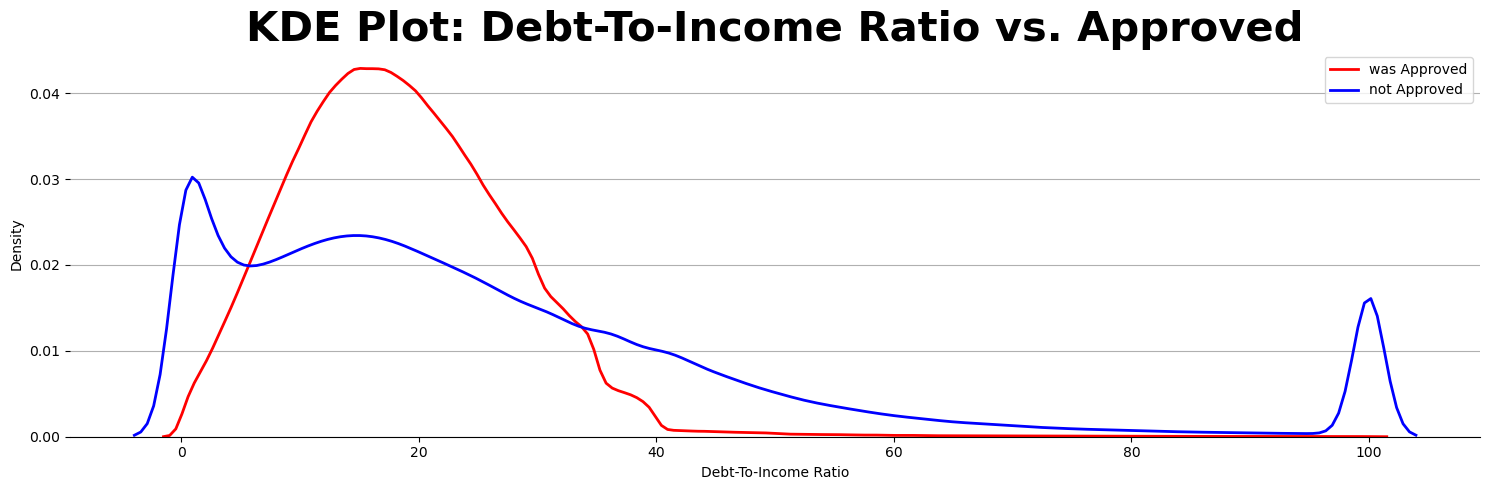

In [18]:
myFunc.plot_kde(df, "Debt-To-Income Ratio", "Approved")

**Amount Requested**

In [19]:
df.loc[df["Approved"] == 1, "Amount Requested"].describe()

count   2256394.00
mean      15037.67
std        9183.99
min         500.00
25%        8000.00
50%       12850.00
75%       20000.00
max       40000.00
Name: Amount Requested, dtype: float64

In [20]:
df.loc[df["Approved"] == 0, "Amount Requested"].describe()

count   2256394.00
mean      12425.11
std       10674.18
min           0.00
25%        4500.00
50%       10000.00
75%       20000.00
max     1200000.00
Name: Amount Requested, dtype: float64

We may see, that there is difference (around 3000 dollars) in means of ammount requested between approved and rejected customers.

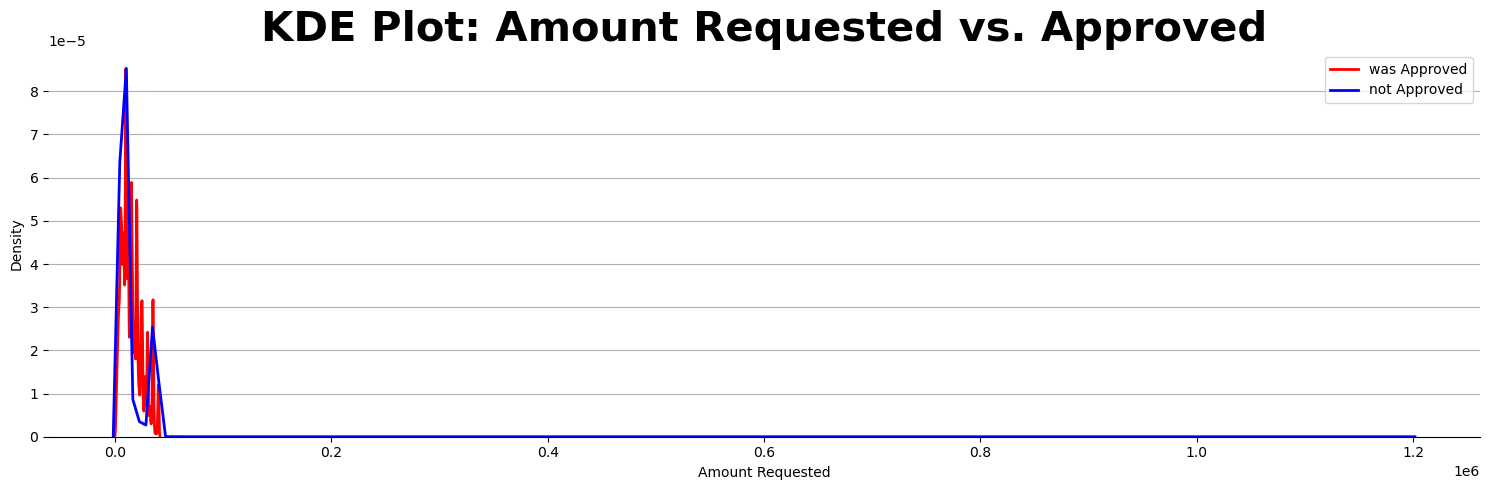

In [21]:
myFunc.plot_kde(df, "Amount Requested", "Approved")

Let's try to use logaritmic scale for this.

In [22]:
df = myFunc.log_feature(df, "Amount Requested")

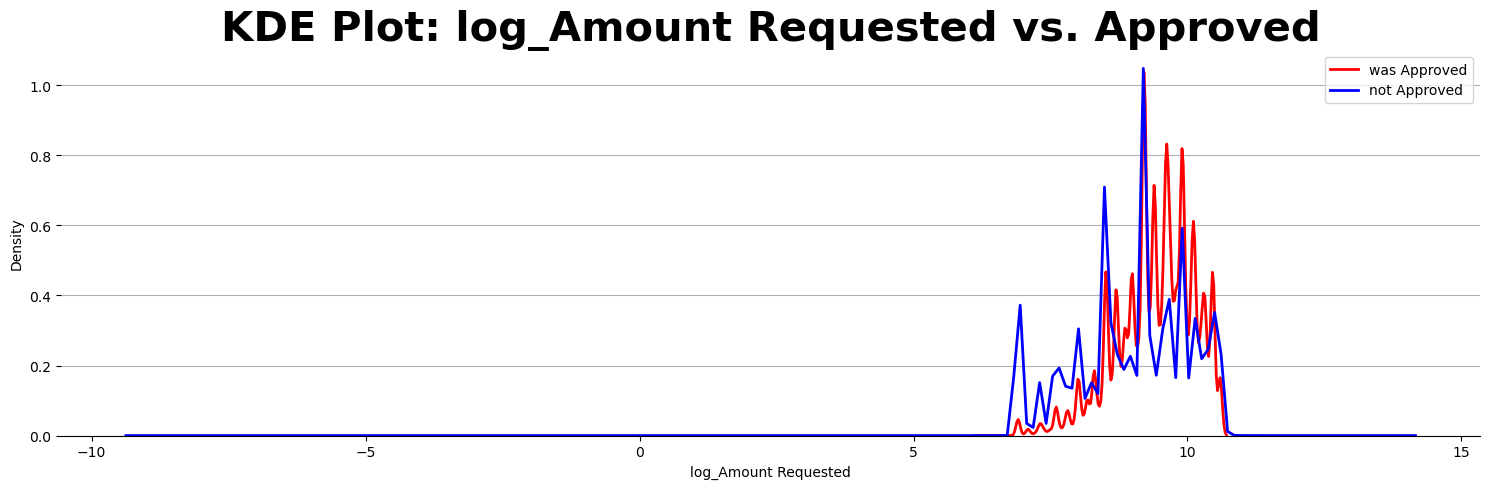

In [23]:
myFunc.plot_kde(df, "log_Amount Requested", "Approved")

In [24]:
df = df.drop(["log_Amount Requested"], axis=1)

**Risk_Score**

In [25]:
df.loc[df["Approved"] == 1, "Risk_Score"].describe()

count   2256394.00
mean        700.57
std          33.00
min         612.00
25%         677.00
50%         692.00
75%         717.00
max         847.50
Name: Risk_Score, dtype: float64

In [26]:
df.loc[df["Approved"] == 0, "Risk_Score"].describe()

count   778043.00
mean       628.30
std         89.02
min          0.00
25%        592.00
50%        637.00
75%        675.00
max        990.00
Name: Risk_Score, dtype: float64

We may see, that there is difference (around 70 scores) in means of risk score between approved and rejected customers. Approved customers ussualy get 700, rejected 628.

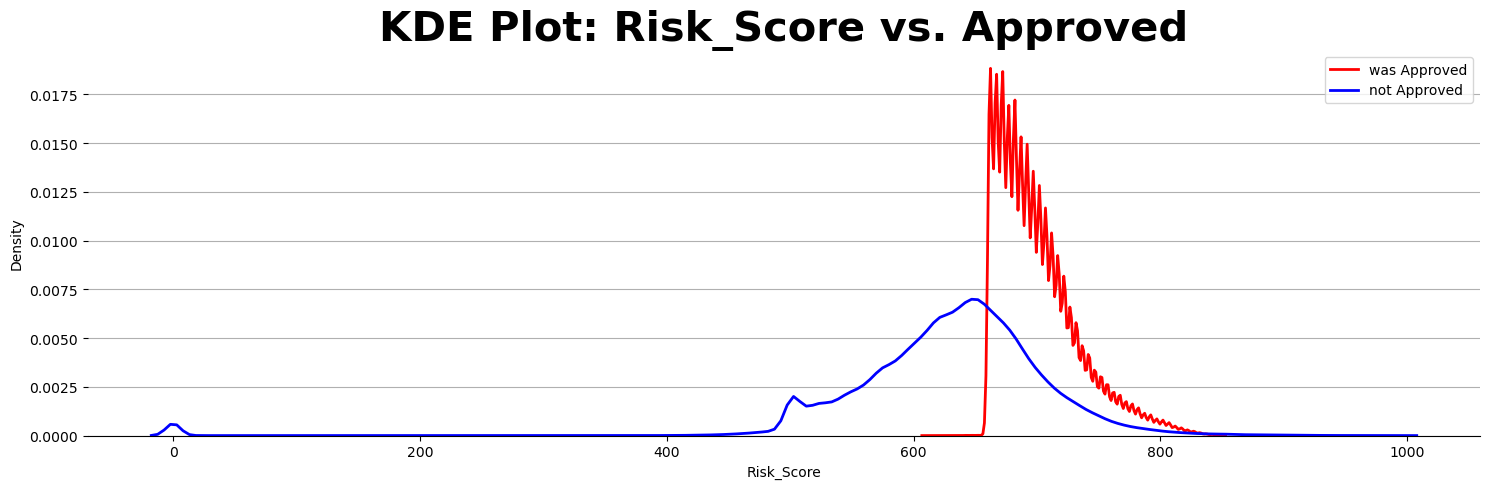

In [27]:
myFunc.plot_kde(df, "Risk_Score", "Approved")

Loans are being approved starting from 650 and more risk score.

**Policy Code**

In [28]:
df["Policy Code"].value_counts()

1.00    2256394
0.00    2249694
2.00       6621
Name: Policy Code, dtype: int64

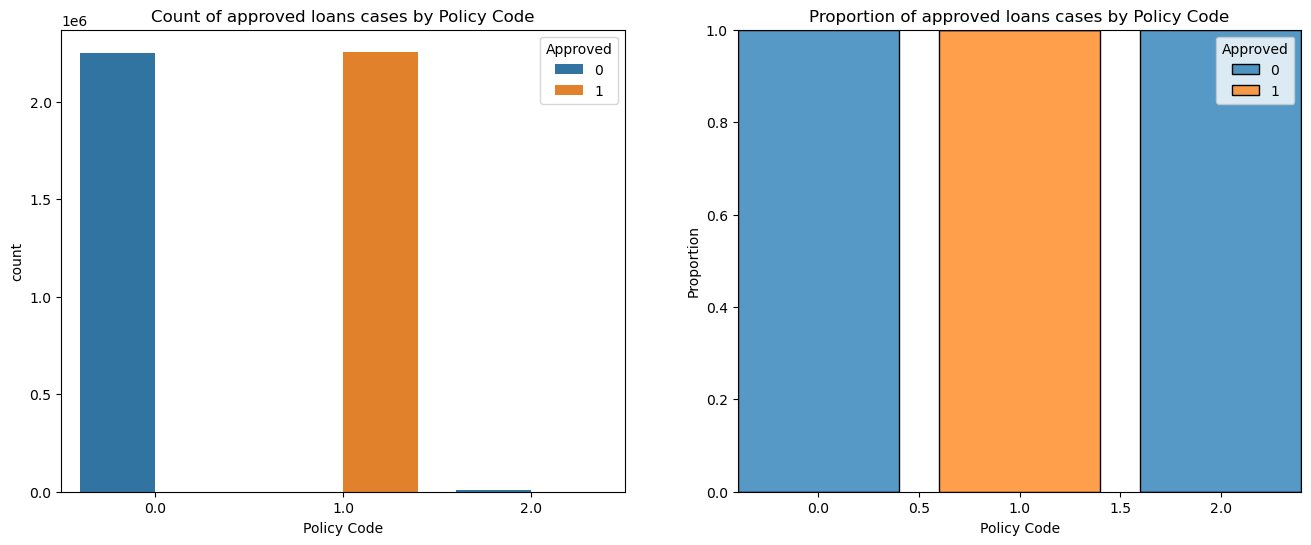

In [29]:
myFunc.my_plots(
    df,
    "Policy Code",
    "Approved",
    "Count of approved loans cases by Policy Code",
    "Proportion of approved loans cases by Policy Code",
)

We see, that policy code has 100% correlation with target, so we will need to drop it from our module, otherwise we do not need to build a model, because we can get answer by looking into this feature. Policy code will show the correct answers to model.

**Year**

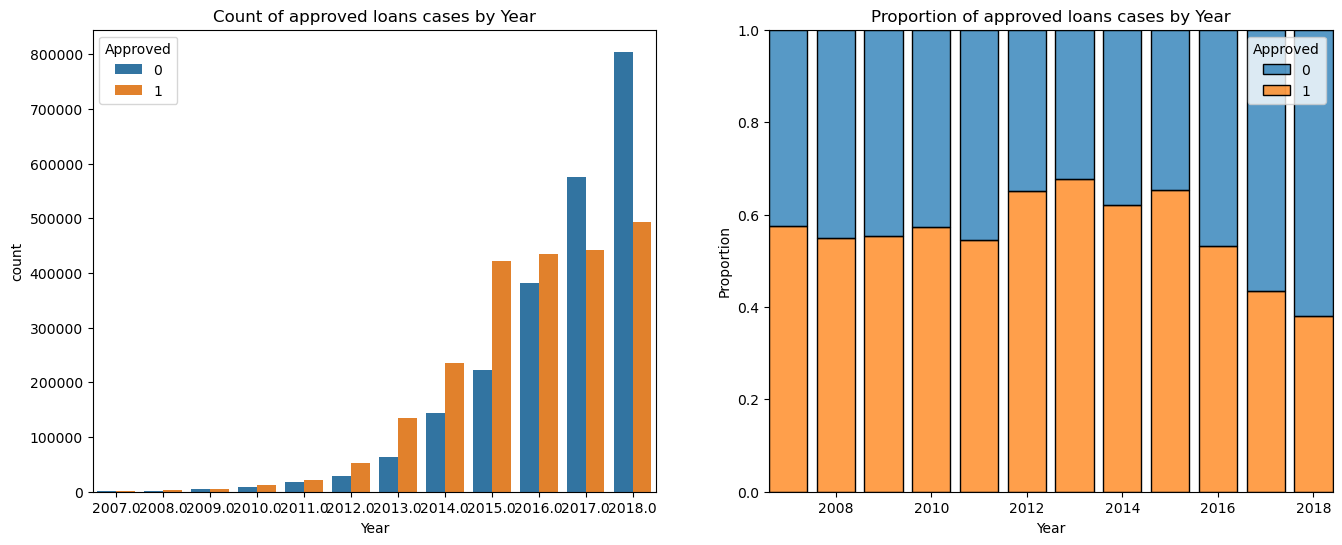

In [30]:
myFunc.my_plots(
    df,
    "Year",
    "Approved",
    "Count of approved loans cases by Year",
    "Proportion of approved loans cases by Year",
)

I do not see any proportion dependancy on year, but we may see, that popularity of Lending club is growing.

**Month**

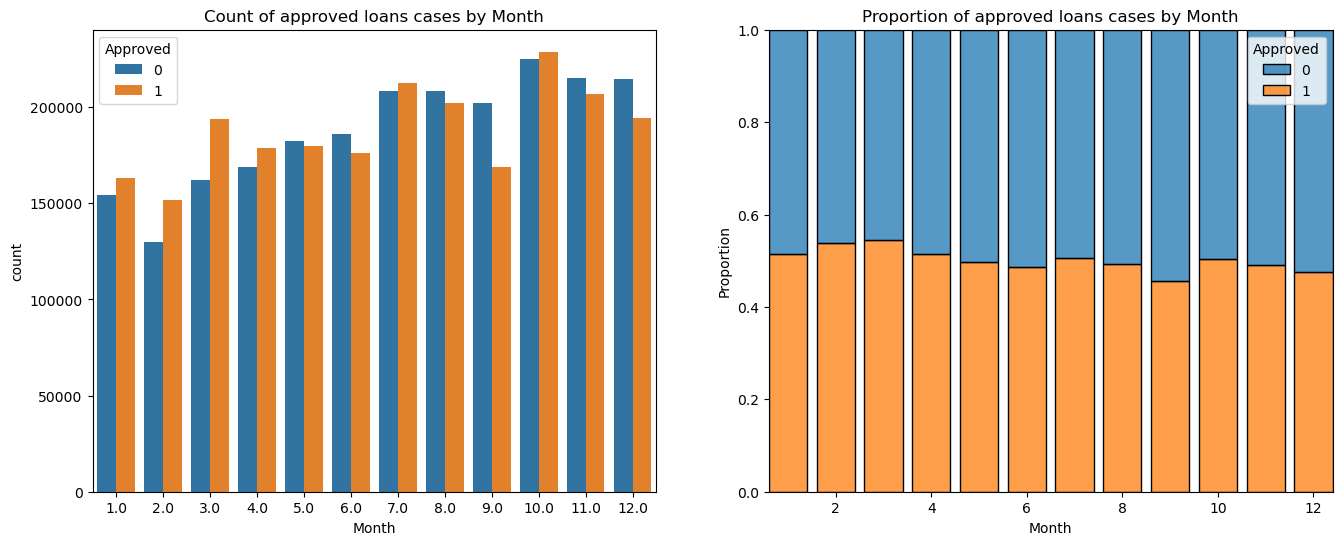

In [31]:
myFunc.my_plots(
    df,
    "Month",
    "Approved",
    "Count of approved loans cases by Month",
    "Proportion of approved loans cases by Month",
)

I do not see any proportion dependancy on month, but we may see, that popularity of Lending club is bigger before Christmas.

**State**

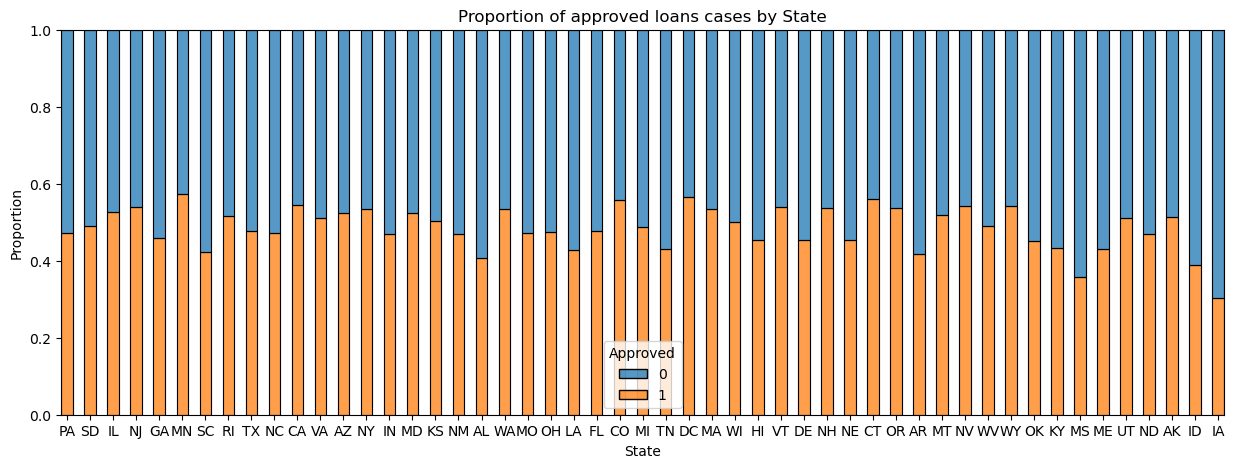

In [32]:
myFunc.my_proportionsplot(
    df, "State", "Approved", "Proportion of approved loans cases by State"
)

I do not see any proportion dependancy on State, this feature does not seem to be important.

# Correlation

Text(0.5, 1.0, 'Features Correlation Heatmap')

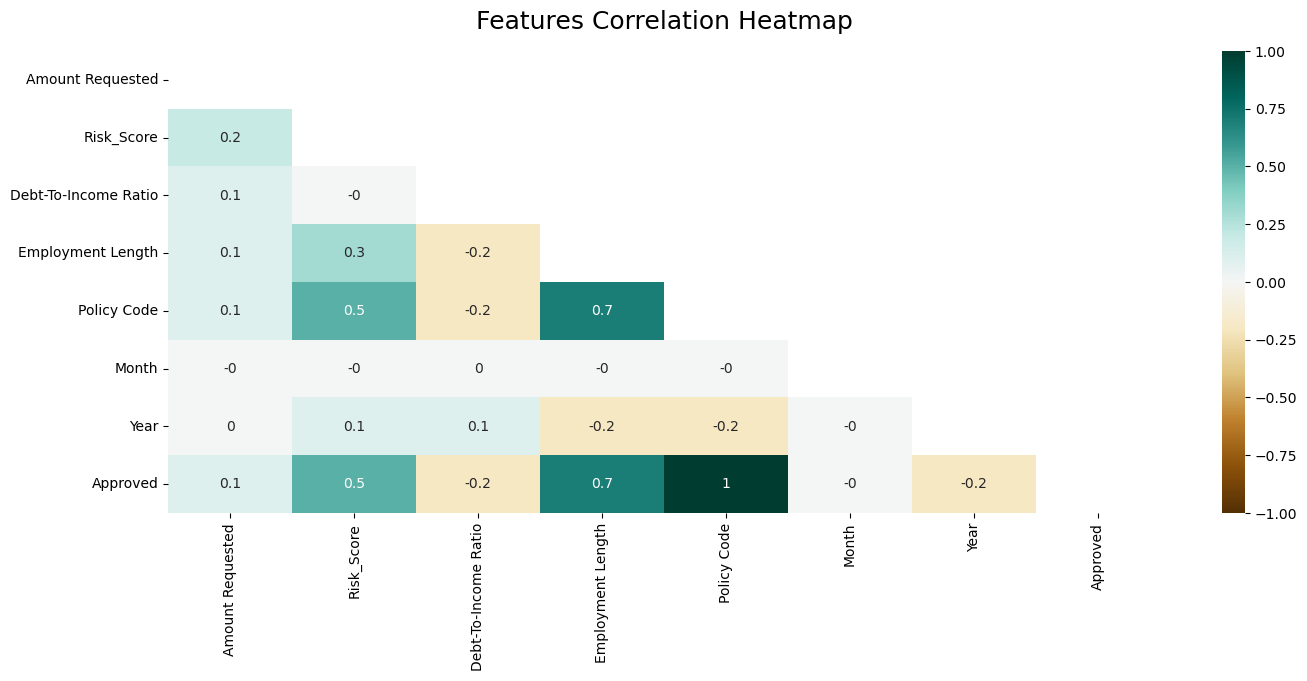

In [33]:
plt.figure(figsize=(16, 6))
mask1 = np.triu(np.ones_like(df.corr(), dtype=bool))
heatmap = sns.heatmap(
    df.corr().round(1), mask=mask1, vmin=-1, vmax=1, annot=True, cmap="BrBG"
)
heatmap.set_title("Features Correlation Heatmap", fontdict={"fontsize": 18}, pad=16)

We may see, that Policy code is 100 % correlataed. In the modeling part we will need to drop it, because this feature will tell all answers to our model. Also we may see, that Employment lenght is important feature.

# Statistical inference

During the exploratory data analysis (EDA), the unussual disparities were identified in the **proportion of individuals with employment lenght 5 years and 4 years** when comparing  those who had approved loean. Also **mean average risk score** of people who had approved loean and those who had not.  
To ascertain their statistical significance, we will now proceed with appropriate statistical inference procedures.

**Difference in proportions - employment lenght 5 years and 4 years** 
 
Let's see if the difference in proportions of LC customers, who was approved, among being employd 5 years and being employed 4 years is  statistically significant.

In [34]:
df_5_4 = df[(df["Employment Length"] == 5.00) | (df["Employment Length"] == 4.00)]

Let's calculatet approval rates of two employment groups.

In [35]:
df_emp = df_5_4.groupby("Employment Length")[["Approved"]].agg(["sum", "count"])
df_emp = df_emp.droplevel(0, axis=1).reset_index()
df_emp["proportion"] = df_emp["sum"] / df_emp["count"]
df_emp

,Employment Length,sum,count,proportion
0,4.00,136526,146867,0.93
1,5.00,139617,321786,0.43


We can observe that 93% of individuals who had been working for 4 years were approved for the loan, while only 43% of those who had been working for 5 years received approval."

**Research question**

Is there a significant difference in the approval rates between individuals who had been working for 4 years and those who had been working for 5 years?

**Population**  
Lending Club customers  
4 -  patients who were approved and have employment lengt of 4 years (146 867)  
5 -  patients who were approved and have employment lengt of 5 years (321 786)

**Parameter of interest** 
Difference in population proportions:  
p(4) - p(5)

**Power of the test** ($1 - \beta$) - 0.8 

**Significance level**: 0.05

**Null Hypothesis:** p4 - p5 =< 0 

**Alternative Hypothesis:** p4 - p5 > 0

One tail testing, we assuem that p(4) is larger.

**Assumptions**:
1. Our samples are independent from each other.

**Preliminary power test analysis**  

Let's get the needed sample size to avoid p-hacking.

In [36]:
myFunc.Power_test_one_tail(0.93, 0.43)

 Required sample size:12


Our same size is bigger, so we should avoid Pi hacking.

In [37]:
myFunc.calc_pi_t_test_proportions(df_emp)

Pi value for diff in proportions using t test:0.0


We calculated a p-value of approximately 0, which falls below our alpha value of 0.05. As a result, **we have evidence to reject the null hypothesis**.  

We can conclude that a significant distinction exists between the population proportions of approved loan customers among individuals who were working 5 anf 4 years. Individuals who had been working 4 years are more likely to get a loan.

**Confidence intervals**

1. Confidence level of 95%.
2. Significant level alpha = 0.05

In [38]:
df_emp

,Employment Length,sum,count,proportion
0,4.00,136526,146867,0.93
1,5.00,139617,321786,0.43


In [39]:
myFunc.calc_confid_intervals(df_emp)

Confidence interval is   0.49 - 0.5


The 95% confidence interval above shows that any value for the difference of population proportions is lying between 
0.49 and 0.5. Our estimated difference was 0.5, which falls within this interval. Notably, the value 0 does not fall within this range.
Hence, the null hypothesis, which suggests that the difference between proportions could be 0 or less, has been appropriately rejected.

Conclusion: LC clients who have been working for 5 years are approximately 49% to 50% less likely to get a loan compared to LC clients who have been working for 4 years.

### Difference in means - Risk score
 
Let's see if the difference in means of risk score, among customers who were approved and did not is statistically significant.

**Research question**  
When considering LC customers, who's loans reques was approved and who's did not, is the difference in means of risk score is statistically significant?

**Population**
the Lending Club customers.

**Population subgroup**
People, who's loans reques was approved (1)
People, who's loans reques was not approved (0)

**Parameter of Interest**: difference in population subgroups mean Risk score.

**Explanation**:
$\mu$ (1)- mean risk score of people, who's loans reques was approved

$\mu$ (0) - mean risk score of people, who's loans reques was not approved

**Power of the test** ($1 - \beta$) - This represents the probability to find a statistical difference between two groups when a difference is actually present. This is usually set at 0.8.

**Significance level $\alpha$** : 0.05

**Confidence level** = 95%

**Null Hypothesis:** H(O): $\mu$ (1) -$\mu$ (0) =< 0

**Alternative Hypothesis:** $\mu$ (1) - $\mu$ (0) > 0 

This will be a *one tail* testing.

**Assumptions**:
1. We assume that groups are simple random samples. Samples are independent one from each other.
2. The distribution of both subpopulations are not fully normal, but as we have a lot of abservations, we can count on Central limit theorem.
3. We can not use pooled approach, because std is not similar.

The $\alpha$ value is a threshold we set, by which we say "if the probability of observing a result as extreme or more ($p$-value) is lower than $\alpha$, then we reject the null hypothesis". 


In [40]:
for_testing = df.groupby("Approved")["Risk_Score"].agg(["mean", "std", "count"])
for_testing

,mean,std,count
Approved,,,
0,628.30,89.02,778043
1,700.57,33.00,2256394


Two-sample T-Test with unequal variance can be applied when  
(1) the samples are normally distributed (we count on CLT)  
(2) the standard deviation of both populations are unknown and assume to be unequal   
(3) sample is sufficiently large (over 30).

In [41]:
n1 = for_testing.iloc[1][2]
mu1 = for_testing.iloc[1][0]
sd1 = for_testing.iloc[1][1]
print(n1, mu1, sd1)

2256394.0 700.5714547193443 33.0020578955946


In [42]:
n0 = for_testing.iloc[0][2]
mu0 = for_testing.iloc[0][0]
sd0 = for_testing.iloc[0][1]
print(n0, mu0, sd0)

778043.0 628.3011016100653 89.0153595256227


In [43]:
# Mean difference
mean_diff = mu1 - mu0
# Estimated std
est_std = np.sqrt((sd1**2 + sd0**2) / 2)

In [44]:
# Power of the test calculation
effect_size = mean_diff / est_std
required_n = sms.NormalIndPower().solve_power(
    effect_size, power=0.8, alpha=0.05, ratio=1, alternative="larger"
)
required_n = ceil(required_n)
print(required_n)

11


Our sample sizes are bigger than 47, so Pi hacking should be avoided.

In [45]:
df1 = df.dropna()
df1.isnull().sum()

Amount Requested        0
Risk_Score              0
Debt-To-Income Ratio    0
Employment Length       0
State                   0
Policy Code             0
Month                   0
Year                    0
Approved                0
dtype: int64

In [46]:
statistics, p_value = stats.ttest_ind(
    df1.loc[df["Approved"] == 1]["Risk_Score"],
    df1.loc[df["Approved"] == 0]["Risk_Score"],
    equal_var=False,
    alternative="greater",
)
print(f"T-statistic: {statistics}, p-value: {p_value}")

T-statistic: 699.4829023122403, p-value: 0.0


The difference between sample means of risk scores, are above the hypothesized 0 value by almost 700 estimated standard errors.  
P-value is smaller then alpha 0,05, so we reject our null hypothesis.  
Mean of risk scores is significantly higher of customers, who's loan was approved.

In [47]:
# Calculation of conficence intervals:

# Margin of error
Margin1 = sd1 / np.sqrt(n1)
Margin0 = sd0 / np.sqrt(n0)
sem_diff = np.sqrt(Margin1**2 + Margin0**2)

lcb = mean_diff - 1.96 * sem_diff
ucb = mean_diff + 1.96 * sem_diff
print(
    f"Confidence interval is between {lcb.round(1)} and {ucb.round(1)}, estimated difference: {mean_diff.round(1)}"
)

Confidence interval is between 72.1 and 72.5, estimated difference: 72.3


With 95% confidence, the difference in means of risk scores between the groups of people whose loan requests were approved and those whose requests were not approved is estimated to range from 72.1 to 72.5. Since the confidence interval does not include 0, and the calculated difference in sample means falls within this interval, we can conclude that there is a statistically significant difference in risk scores between these two groups.